# Homework 2

## Part I
Notice, $e^{a+b} = e^a\cdot e^b$ implies that we can subtract/add terms that do not involve $\theta$ in exponent of the $\exp$ function. Therefore, modulus of an arbitrary constant $c \in \mathbb{R}$, we have 
\begin{align*}
    \tau(\theta-\theta_0)^2 + \phi\sum_{i=1}^{n}(x_i-\theta)^2 &\cong\tau(\theta^2-2\theta_0\theta + \theta_0^2) + \phi\sum_{i=1}^{n}(x_i^2-2\theta x_i + \theta^2)\\
    &\cong \tau \theta^2 - 2\tau\theta_0\theta -2\phi\theta\sum_{i=1}^{n}x_i + n\phi\theta^2 \\
    &\cong (\tau+n\phi)\left[\theta^2 - 2\frac{1}{\tau+n\phi}\theta\cdot \left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right) \right]\\
    &\cong (\tau+n\phi)\left[\theta^2 - 2\frac{1}{\tau+n\phi}\theta\cdot \left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right) + \frac{1}{(\tau+n\phi)^2}\left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)^2 \right]\\
    &\cong (\tau+n\phi)\left[\theta - \frac{1}{\tau+n\phi}\left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)\right]^2
\end{align*}
Multiplying both sides by $-\frac{1}{2}$ and apply $\exp$ yields
\begin{align*}
    \exp\left[-\frac{1}{2}\left(\tau(\theta-\theta_0)^2 + \phi\sum_{i=1}^{n}(x_i-\theta)^2\right) \right] \propto \exp\left[-\frac{1}{2}(\tau+n\phi)\left[\theta - \frac{1}{\tau+n\phi}\left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)\right]^2\right]
\end{align*}
<div style="text-align: right"> $\square$ </div>





## Part II - 1

In [2]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import math

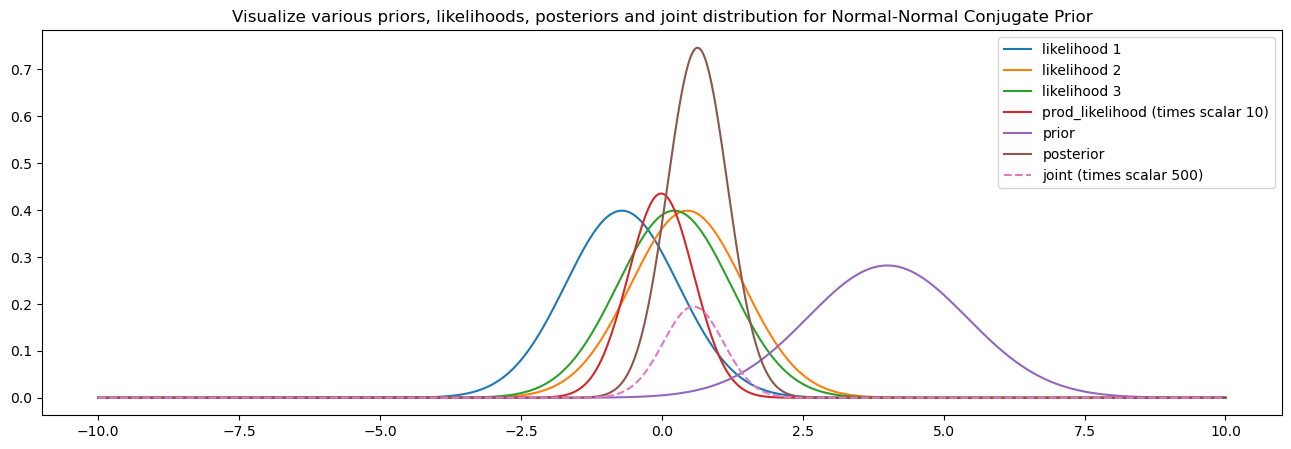

In [20]:
## We plot individual likelihood for the three observations shown in the Classic Bayes Lecture slide

#
np.random.seed(seed=233423)

# Set parameter domain and hyper-parameters
parameter_domain = np.linspace(-10,10,1001)
theta_0 = 4
tau = 1./2

# Prior distribution of theta
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Simulate 3 normal observations 
n = 3
sigma = 1.
x_vec = stats.norm(loc=0,scale=sigma).rvs(n)

# Build likelihood for individual observation
likelihoods = []
for x in x_vec:
    pdf = stats.norm.pdf(x, loc=parameter_domain, scale =sigma)  
    likelihoods.append(pdf)

# Build joint and posterior likelihood
scale_joint = 500
scale_like = 10
product_likelihood = np.array(likelihoods).prod(axis=0)
joint = scale_joint * product_likelihood * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

# Plot everything
plt.figure(figsize=(16,5))
for i in range(len(likelihoods)):
    plt.plot(parameter_domain, likelihoods[i], label="likelihood "+str(i+1)+" ")
plt.plot(parameter_domain, scale_like*product_likelihood, label="prod_likelihood (times scalar "+str(scale_like)+")")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(scale_joint)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors and joint distribution for Normal-Normal Conjugate Prior"); 

## Part II - 2

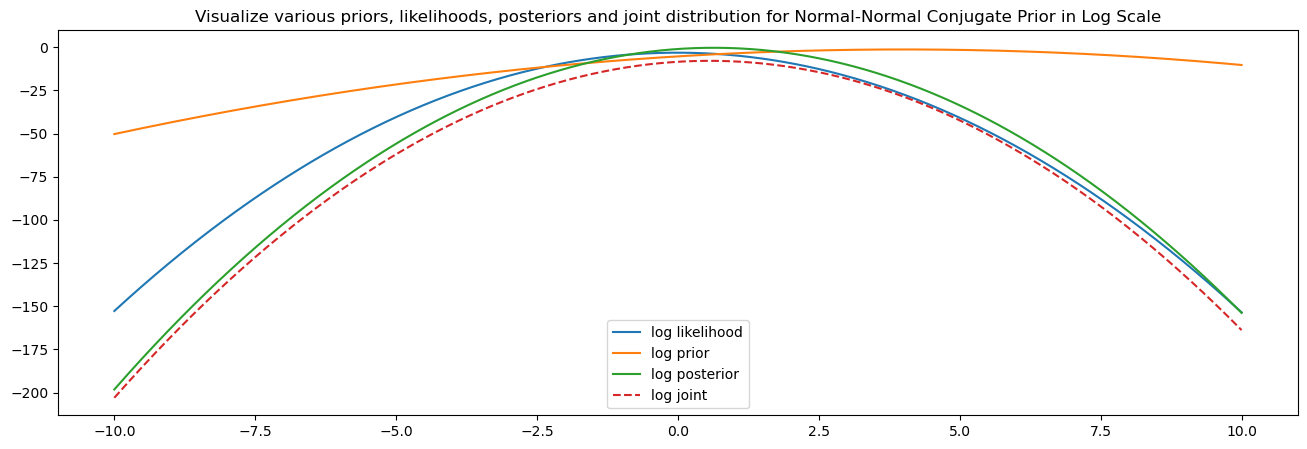

In [26]:
# Build log Prior
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)


# Build a single log-likelihood 
log_likelihood = stats.norm.logpdf((x_vec[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) 
# Build log joint and posterior
log_joint = log_likelihood + log_prior
log_posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

# Plot everything in log scale
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="log likelihood")
plt.plot(parameter_domain, log_prior, label="log prior")
plt.plot(parameter_domain, log_posterior, label="log posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="log joint")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors and joint distribution for Normal-Normal Conjugate Prior in Log Scale"); 

## Part II - 3
Let $\mathbf{x} = (x_1,...,x_n)$, we compute
\begin{align*}
    p(\theta|\mathbf{x}) &\propto p(\mathbf{x}|\theta)p(\theta) \propto p(\mathbf{x}|\theta) = \prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right]
\end{align*}
Now, using the reasoning as Part I, for the exponent term in $\exp$ from the expression above, we have
\begin{align*}
    \phi \sum_{i=1}^{n}(x_i-\theta)^2 &\cong \phi(n\theta^2 - 2\theta\sum_{i=1}^{n}x_i)\\
    &\cong n\phi \left(\theta^2 - 2\frac{1}{n}\theta\sum_{i=1}^{n}x_i + \frac{1}{n^2}\left(\sum_{i=1}^{n}x_i\right)^2\right)\\
    &\cong n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2
\end{align*}
Therefore, we have
\begin{align*}
     p(\theta|\mathbf{x}) &\propto \prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right] \propto \exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]
\end{align*}
This shows that the posterior is a normal distribution $N(\frac{1}{n}\sum_{i=1}^{n}x_i, \frac{1}{n\phi})$

## Part II - 4
We assume a normal likelihood for $\mathbf{x}|\theta$ with the form
\begin{equation*}
    p(\mathbf{x}|\theta)=\sqrt{\frac{\phi}{2\pi}}\prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right]
\end{equation*}
Now, since the prior $p(\theta) \propto 1$, wlog, we can assume $p(\theta)=1$. Then, we compute
\begin{align*}
    p(\theta|\mathbf{x}) &= \frac{p(\mathbf{x}|\theta)\cdot p(\theta)}{p(\mathbf{x})} =\frac{p(\mathbf{x}|\theta)}{\int_{\mathbb{R}} p(\mathbf{x}|\theta)}
\end{align*}
From Part II - 3, we know that, with some constant $C \in \mathbb{R}$
\begin{align*}
    \prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right] = C\cdot \exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]
\end{align*}
This implies
\begin{align*}
    \sqrt{\frac{\phi}{2\pi}}\prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right] &=\sqrt{\frac{\phi}{2\pi}}\cdot C \cdot \exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]\\
    &=\sqrt{\frac{\phi}{2\pi}}\cdot C \cdot \sqrt{\frac{2\pi}{n\phi}} \cdot \sqrt{\frac{n\phi}{2\pi}}\exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]\\
    &=\frac{C}{\sqrt{n}}\sqrt{\frac{n\phi}{2\pi}}\exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]
\end{align*}
Hence,
\begin{align*}
    \int_{\mathbb{R}} p(\mathbf{x}|\theta) = \frac{C}{\sqrt{n}}\int_{\mathbb{R}}\sqrt{\frac{n\phi}{2\pi}}\exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right] = \frac{C}{\sqrt{n}}
\end{align*}
It is left to figure out what $C$ is. Recall from the derivation of Part II - 3, for the exponent in the $\exp$ function, we drop the term $\phi\sum_{i=1}^{n}x_i^2$ and add the term $n\cdot \frac{\phi}{n^2}\left(\sum_{i=1}^{n}x_i\right)^2$ to obtain $n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2$. This implies that 
\begin{align*}
    \prod_{i=1}^{n}\exp\left[-\frac{\phi}{2}(x_i-\theta)^2\right] = \exp\left(-\frac{\phi}{2}\sum_{i=1}^{n}x_i^2\right)\exp\left[\frac{1}{2}\frac{\phi}{n}\left(\sum_{i=1}^{n}x_i\right)^2\right]\exp\left[-\frac{1}{2}n\phi \left(\theta - \frac{1}{n}\sum_{i=1}^{n}x_i\right)^2\right]
\end{align*}
So, we let $C = \exp\left(-\frac{\phi}{2}\sum_{i=1}^{n}x_i^2\right)\exp\left[\frac{1}{2}\frac{\phi}{n}\left(\sum_{i=1}^{n}x_i\right)^2\right]$ and conclude that
\begin{align*}
    p(\theta|\mathbf{x})\cdot \frac{\sqrt{n}}{C} = p(\mathbf{x}|\theta)
\end{align*}
